## **Bienvenido a la tercera práctica de Jupyter Notebook**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jpcano1/MINE-4101-tareas/blob/master/lab_3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png"/>Run in Google Colab</a>
  </td>
</table>

## **Caso**
- Teniendo en cuenta los datos recopilados de la encuesta Nacional de uso del tiempo-ENUT¹, utilizados en la tarea anterior:
    1. Plantea las hipótesis de negocio que permitan profundizar el objetivo principal de ENUT (ver sección 1.2 objetivos del Manual de conceptos básicos ENUT²).
    2. Identifique las variables que considere necesarias para dar respuesta a estas hipótesis y construya el respectivo dataframe. Puede utilizar todas las fuentes disponibles que se encuentran en la página del DANE
    3. Realice un estudio de calidad de datos sobre el dataframe consolidado en el punto anterior, para ello, utilice los conceptos vistos en clase (ejemplo: completitud).
    4. Realice un análisis estadístico univariado que permita validar las hipótesis planteadas en el punto 1 y presente las respectivas conclusiones.
    
> ¹http://microdatos.dane.gov.co/index.php/catalog/214/get_microdata

> ²http://microdatos.dane.gov.co/index.php/catalog/214/related_materials

***

- **Objetivo General**:

La encuesta Nacional del Uso del Tiempo, es una investigación desarrollada por el DANE, con el fin de generar información sobre el tiempo dedicado por la   población de 10 años y más a actividades de trabajo y personales

- **Objetivos específicos**:
    1. Proporcionar información para la construcción de la cuenta satélite de trabajo no remunerado.
    2. Producir información para la formulación, seguimiento y evaluación de la política pública con enfoque de género.
    3. Proporcionar información para la formulación, seguimiento y evaluación de la política pública en temas relacionados con el uso del tiempo.

## **1. Hipótesis de Trabajo**
- El estrato influye en el número de horas trabajadas a la semana
- Dependiendo del estrato, se sabrá si el usuario vive con el papá o la mamá
- Dependiendo de la región del país, se tendrán o no usuarios con contratos laborales.

## **2. Indentificación de Variables**

In [ ]:
!pip install -q pyreadstat
!pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [22]:
import pandas as pd
import numpy as np

import requests

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import pandas_profiling

### **Obtención de Datos**

In [ ]:
# condiciones_vivienda.sav
url_condiciones = "https://docs.google.com/uc?export=download&id=1NR-vs40PQp4_YypFxcL0S3Hz-MvT0Tsr" 

# fuerza_trabajo.sav
url_fuerza = "https://docs.google.com/uc?export=download&id=1yR5I34jRgLYfpt5VCi7JjEFDwJ-ypqcd" 

# composicion_hogar.sav
url_composicion = "https://docs.google.com/uc?export=download&id=1d-Fgbxd3M886CjJKTyMyy3iH1hgGErVw"

In [3]:
def null_percentage(df, int_mode=False):
    """
    :param df:
    :param int_mode:
    :return:
    """
    null_percentages = dict()
    for col in df.columns:
        percentage = df[col].isna().sum() * 100
        percentage /= df.shape[0]
        if not int_mode:
            percentage = f"{percentage}% of null values"
        null_percentages[col] = percentage
    return null_percentages

def download_content(url, filename="image.jpg"):
    """
    Función que se encarga de descargar un archivo deseado
    :param url: la url de descarga
    :param filename: El nombre del archivo
    """
    r = requests.get(url)
    with open(filename, "wb") as f:
        f.write(r.content)
    return

def drop_null_column(df, drop_perc=85):
    """
    :param df:
    :return:
    """
    null_perc = null_percentage(df, int_mode=True)
    for col in df.columns:
        if null_perc[col] > drop_perc:
            df.drop(columns=col, inplace=True)

In [ ]:
download_content(url_condiciones, "condiciones_vivienda.sav")
download_content(url_fuerza, "fuerza_trabajo.sav")
download_content(url_composicion, "composicion_hogar.sav")

In [ ]:
data_condiciones = pd.read_spss("condiciones_vivienda.sav")
data_fuerza = pd.read_spss("fuerza_trabajo.sav")
data_composicion = pd.read_spss("composicion_hogar.sav")

In [ ]:
columns_condiciones = {
    "FEX_C": "factores_expansion",
    "P424": "tipo_vivienda",
    "P4030S1": "energia_electrica",
    "P4030S1A1": "estrato",
    "P4030S5": "acueducto",
    "P4030S3": "alcantarillado",
    "P4030S4": "recoleccion_basuras",
    "P4030S4A1": "dias_x_semana",
    "P4030S2": "gas_natural_dom",
    "P4020": "material_pisos",
    "DIA_REFERENCIA_2": "dia_referencia"
}

In [ ]:
columns_fuerza = {
    'P1099S1': 'horas_ida',
    'P1099S2': 'minutos_ida',
    'P1145': 'ganancia_ayudas',
    'P1150': 'trabajo_dia',
    'P1150S1': 'horas_trabajo',
    'P1150S2': 'minutos_trabajo',
    'P1151': 'horas_semana',
    'P427': 'este_trabajo',
    'P428': 'numero_personas',
    'P6250': 'empleo_secundario',
    'P6370S1': 'oficio_princ',
    'P6390S1': 'rama_princ',
    'P6400': 'misma_empresa',
    'P6426': 'cantidad_tiempo',
    'P6440': 'contrato',
    'P6500': 'ganancias_mes_pasado',
    'P6510': 'ganancia_jubilacion',
    'P6545': 'ganancia_arriendo',
    'P6750': 'ganancia_neta_mes_pasado',
    'P6760': 'numero_meses',
    'P6880': 'lugar_trabajo'
 }

In [ ]:
columns_composicion = {
    'P1172': 'vive_conyuge',
    'P1172S1': 'numero_orden',
    'P1173': 'se_reconoce',
    'P1174': 'comparte_jefatura',
    'P425': 'parentesco_jefe',
    'P426': 'estado_civil',
    'P5754': 'vive_con_padre',
    'P5754S2': 'numero_orden_padre',
    'P5762': 'vive_con_madre',
    'P5762S2': 'numero_orden_madre',
    'P6020': 'sexo',
    'P6040': 'edad'
 }

### **Limpieza de datos**

In [ ]:
drop_null_column(data_condiciones)
drop_null_column(data_fuerza)
drop_null_column(data_composicion)

In [ ]:
data_condiciones.rename(columns=columns_condiciones, inplace=True)
data_condiciones.rename(columns=lambda x: x.lower(), inplace=True)

data_fuerza.rename(columns=columns_fuerza, inplace=True)
data_fuerza.rename(columns=lambda x: x.lower(), inplace=True)

data_composicion.rename(columns=columns_composicion, inplace=True)
data_composicion.rename(columns=lambda x: x.lower(), inplace=True)

In [ ]:
variables_fuerza = [
    "directorio", "contrato", "horas_semana", 
    "empleo_secundario"
]

variables_condiciones = [
    "directorio",  "estrato", "region", "acueducto",
    "alcantarillado", "gas_natural_dom"
]

variables_composicion = [
    "directorio", "vive_con_padre", 
    "vive_con_madre"
]

In [ ]:
data_condiciones = data_condiciones[variables_condiciones]
data_fuerza = data_fuerza[variables_fuerza]
data_composicion = data_composicion[variables_composicion]

In [ ]:
final_data = pd.merge(data_condiciones, 
                    data_fuerza, 
                    how="inner", 
                    on="directorio")
final_data = pd.merge(final_data, data_composicion, 
                    how="inner", on="directorio")

In [ ]:
final_data.to_pickle("final_data.pkl.gz", compression="gzip")

## **3. Estudio de Calidad de los Datos**
- **Completitud**

In [4]:
# final_data.pkl.gz
url_final_data = "https://docs.google.com/uc?export=download&id=1tQXOJsLhus-F8r_J4605lKYfXNERrviW"

In [5]:
download_content(url_final_data, "final_data.pkl.gz")

In [6]:
final_data = pd.read_pickle("final_data.pkl.gz")

In [7]:
final_data.head()

,directorio,estrato,region,acueducto,alcantarillado,gas_natural_dom,contrato,horas_semana,empleo_secundario,vive_con_padre,vive_con_madre
0,2915591.0,3.0,Central,Sí,Sí,Sí,No.,4.0,No,No,No
1,2915592.0,1.0,Pacífica,No,No,No,No.,12.0,No,No,No
2,2915593.0,1.0,Central,Sí,Sí,Sí,No.,30.0,No,No,No
3,2915593.0,1.0,Central,Sí,Sí,Sí,No.,30.0,No,No,Sí
4,2915593.0,1.0,Central,Sí,Sí,Sí,No.,30.0,No,No,Sí


In [8]:
def complete_percentage(df, int_mode=False):
    comp_perc = {}
    for col in df:
        perc = df[col].count() * 100
        perc /= df.shape[0]
        if int_mode:
            comp_perc[col] = perc
        else:
            comp_perc[col] = f"{perc}% of non-null values"
    return comp_perc

In [9]:
final_data_null = complete_percentage(final_data)

In [10]:
final_data_null

{'acueducto': '100.0% of non-null values',
 'alcantarillado': '100.0% of non-null values',
 'contrato': '49.3623921186081% of non-null values',
 'directorio': '100.0% of non-null values',
 'empleo_secundario': '49.3623921186081% of non-null values',
 'estrato': '98.20557595073386% of non-null values',
 'gas_natural_dom': '100.0% of non-null values',
 'horas_semana': '49.3623921186081% of non-null values',
 'region': '100.0% of non-null values',
 'vive_con_madre': '100.0% of non-null values',
 'vive_con_padre': '100.0% of non-null values'}

- **Exactitud**

In [13]:
for col in final_data:
    print(f"{col}\n{final_data[col].unique()}")

directorio
[2915591. 2915592. 2915593. ... 2965178. 2965179. 2965180.]
estrato
[ 3.  1.  2.  4.  0. nan  5.  9.  6.]
region
[Central, Pacífica, Oriental, Atlántica, San Andrés, Bogotá]
Categories (6, object): [Central, Pacífica, Oriental, Atlántica, San Andrés, Bogotá]
acueducto
[Sí, No]
Categories (2, object): [Sí, No]
alcantarillado
[Sí, No]
Categories (2, object): [Sí, No]
gas_natural_dom
[Sí, No]
Categories (2, object): [Sí, No]
contrato
[No., NaN, Sí]
Categories (2, object): [No., Sí]
horas_semana
[  4.  12.  30.  nan  25.  20.  45.  48.  40.  75.  50.  70.   8.  54.
  36.  44.   6.  21.  84.  14.  10.  28.  56.   9.  18.  55.  96.  42.
  60.  35. 100.  72.  98.  80.  11.  24.  49.  77.  27.  46.  63.  32.
  64.  31. 105.  37.   3.  16.  15.  71.  59. 126.  58.   5.   7.  33.
   1. 112.   2.  66.  38.  52.  68.  85.  78.  22.  76.  90.  53.  83.
  86. 140.  43.  67.  39.  65.  17.  62.  92.  41. 119.  23.  95.  79.
  91. 110. 108.  51.  73.  47.  13.  89. 120. 107.  19.  82.  57. 

In [15]:
final_data = final_data.query("estrato!=9")

## **Análisis estadístico univariado**

- Como se puede observar, más que todo en estratos 1, 2, 3, 4, y 5, las personas suelen trabajar más horas a la semana.

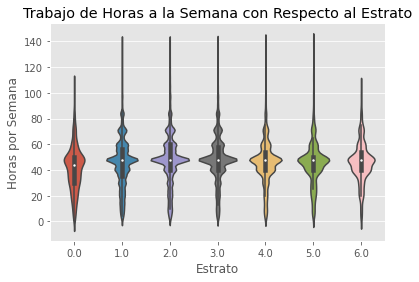

In [ ]:
sns.violinplot(x=final_data["estrato"], y=final_data["horas_semana"])
plt.xlabel("Estrato")
plt.ylabel("Horas por Semana")
plt.title("Trabajo de Horas a la Semana con Respecto al Estrato")
plt.show()

- De igual forma, también se ve que hay mayor incidencia en usuarios de estrato 1 y 2 que viven con sus padres.

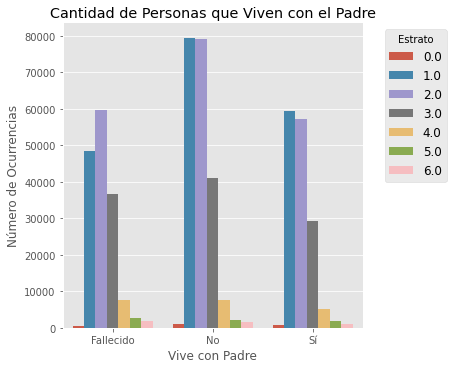

In [55]:
ax = sns.catplot("vive_con_padre", kind="count", 
                 hue="estrato", data=final_data, legend=False)
ax.set_xlabels("Vive con Padre")
ax.set_ylabels("Número de Ocurrencias")
plt.legend(loc="best", fontsize=15, title="Estrato", 
           prop={'size': 12}, bbox_to_anchor=(1.3, 1))
plt.title("Cantidad de Personas que Viven con el Padre")
plt.show()

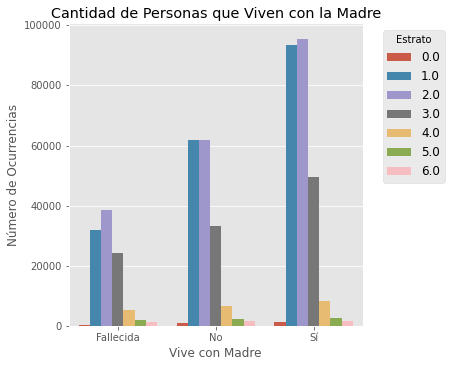

In [82]:
ax = sns.catplot("vive_con_madre", kind="count", 
                 hue="estrato", data=final_data, legend=False)
ax.set_xlabels("Vive con Madre")
ax.set_ylabels("Número de Ocurrencias")
plt.legend(loc="best", fontsize=15, title="Estrato", 
           prop={'size': 12}, bbox_to_anchor=(1.3, 1))
plt.title("Cantidad de Personas que Viven con la Madre")
plt.show()

- Finalmente, podemos ver que en la región Atlántica, la región central y la pacífica se cuenta con mayor número de usuarios sin un contrato laboral. Lo que puede indicar índices de informalidad en el trabajo.

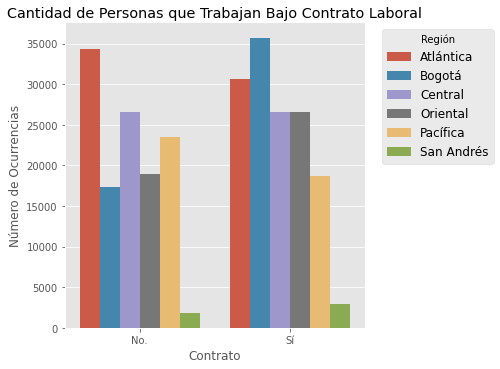

In [83]:
ax = sns.catplot("contrato", kind="count", hue="region", 
                 data=final_data, legend=False)
ax.set_xlabels("Contrato")
ax.set_ylabels("Número de Ocurrencias")
plt.legend(loc="best", fontsize=15, title="Región", 
           prop={'size': 12}, bbox_to_anchor=(1.45, 1))
plt.title("Cantidad de Personas que Trabajan Bajo Contrato Laboral")
plt.show()